         Date      Product Name                           Product URL  Brand  \
0  2023-01-01  Apple Vision Pro  https://example.com/apple-vision-pro  Apple   
1  2023-02-01  Apple Vision Pro  https://example.com/apple-vision-pro  Apple   
2  2023-03-01  Apple Vision Pro  https://example.com/apple-vision-pro  Apple   
3  2023-04-01  Apple Vision Pro  https://example.com/apple-vision-pro  Apple   
4  2023-05-01  Apple Vision Pro  https://example.com/apple-vision-pro  Apple   

   Sale Price   Mrp  Discount Percentage  Number Of Ratings  \
0        2999  3299                  9.1                150   
1        2999  3299                  9.1                155   
2        2999  3299                  9.1                160   
3        2999  3299                  9.1                165   
4        2999  3299                  9.1                170   

   Number Of Reviews           Upc  Star Rating   Ram  Sales  
0                 30  123456789012          4.5  12GB   5000  
1             

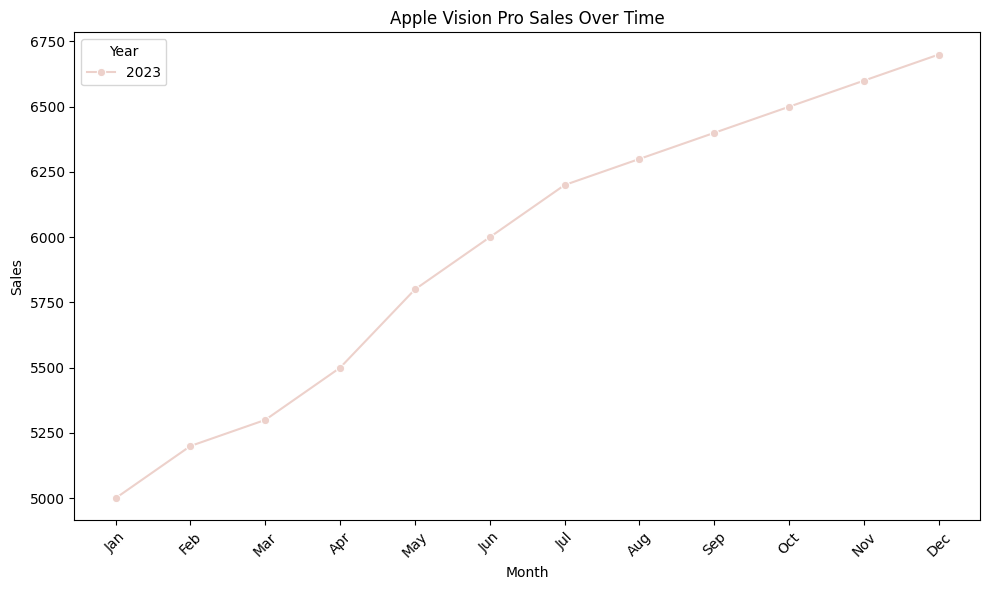

Mean Squared Error: 6973.240015396927
R^2 Score: 0.9869794273571426
    Year  Month  Predicted_Sales
0   2024      1      5090.921788
1   2024      2      5252.234637
2   2024      3      5413.547486
3   2024      4      5574.860335
4   2024      5      5736.173184
5   2024      6      5897.486034
6   2024      7      6058.798883
7   2024      8      6220.111732
8   2024      9      6381.424581
9   2024     10      6542.737430
10  2024     11      6704.050279
11  2024     12      6865.363128


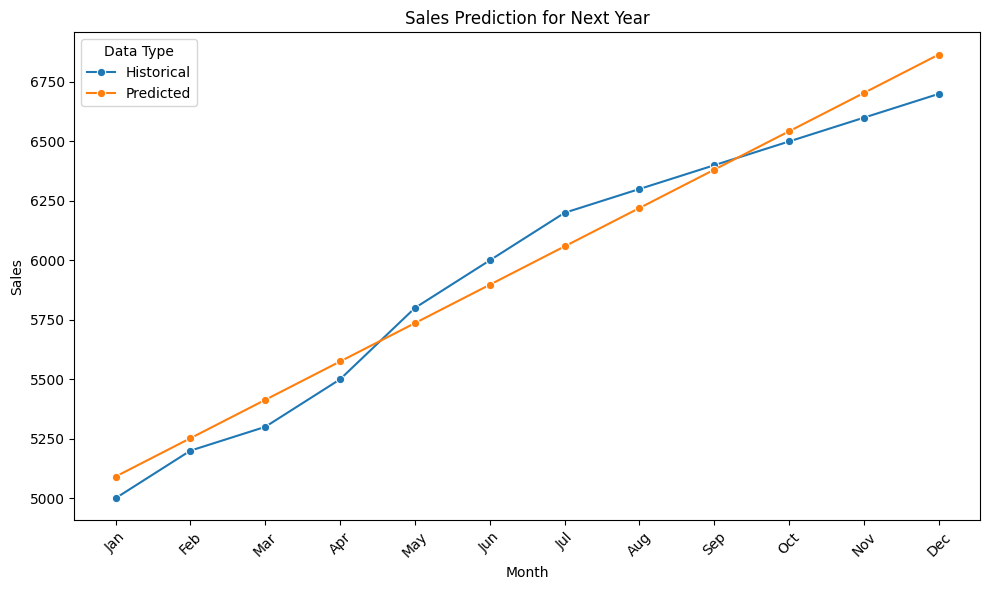

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

# Load the data
apple_products = r'C:\Users\Anuval Mohan sai\Desktop\Project P0\apple_vision_pro_sales.csv'
df = pd.read_csv(apple_products)

# Display the data
print(df.head())

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Use only relevant columns for prediction
df = df[['Year', 'Month', 'Sales']]

# Display processed data
print(df.head())

# Ensure the 'plots' directory exists
if not os.path.exists('plots'):
    os.makedirs('plots')

# Plot historical sales data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Apple Vision Pro Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.savefig('plots/sales_over_time.png')  # Save the plot
plt.show()  # Display the plot

# Prepare data for prediction
X = df[['Year', 'Month']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict sales for next year (e.g., 2024)
next_year = 2024
future_months = pd.DataFrame({
    'Year': [next_year] * 12,
    'Month': list(range(1, 13))
})

future_sales = model.predict(future_months)

# Display predicted future sales
future_sales_df = future_months.copy()
future_sales_df['Predicted_Sales'] = future_sales

print(future_sales_df)

# Combine historical and future sales data for plotting
df['Type'] = 'Historical'
future_sales_df['Type'] = 'Predicted'
plot_data = pd.concat([df, future_sales_df.rename(columns={'Predicted_Sales': 'Sales'})])

# Plot future sales prediction
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='Month', y='Sales', hue='Type', marker='o')
plt.title('Sales Prediction for Next Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Data Type')
plt.tight_layout()
plt.savefig('plots/sales_prediction.png')  # Save the plot
plt.show()  # Display the plot


         Date      Product Name                           Product URL  Brand  \
0  2023-01-01  Apple Vision Pro  https://example.com/apple-vision-pro  Apple   
1  2023-02-01  Apple Vision Pro  https://example.com/apple-vision-pro  Apple   
2  2023-03-01  Apple Vision Pro  https://example.com/apple-vision-pro  Apple   
3  2023-04-01  Apple Vision Pro  https://example.com/apple-vision-pro  Apple   
4  2023-05-01  Apple Vision Pro  https://example.com/apple-vision-pro  Apple   

   Sale Price   Mrp  Discount Percentage  Number Of Ratings  \
0        2999  3299                  9.1                150   
1        2999  3299                  9.1                155   
2        2999  3299                  9.1                160   
3        2999  3299                  9.1                165   
4        2999  3299                  9.1                170   

   Number Of Reviews           Upc  Star Rating   Ram  Sales  
0                 30  123456789012          4.5  12GB   5000  
1             

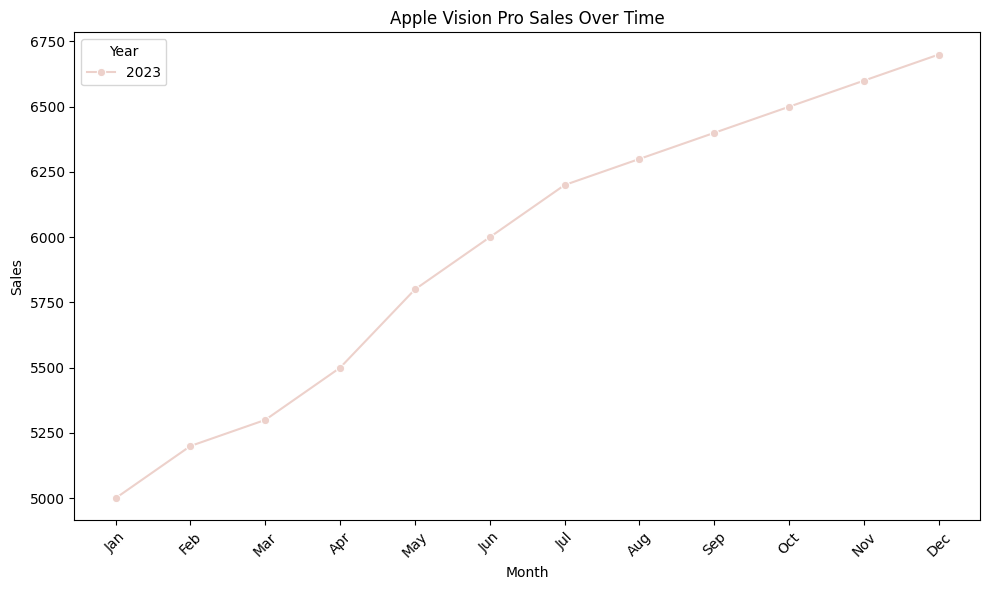

Mean Squared Error: 6973.240015396927
R^2 Score: 0.9869794273571426
    Year  Month  Predicted_Sales
0   2024      1      5090.921788
1   2024      2      5252.234637
2   2024      3      5413.547486
3   2024      4      5574.860335
4   2024      5      5736.173184
5   2024      6      5897.486034
6   2024      7      6058.798883
7   2024      8      6220.111732
8   2024      9      6381.424581
9   2024     10      6542.737430
10  2024     11      6704.050279
11  2024     12      6865.363128


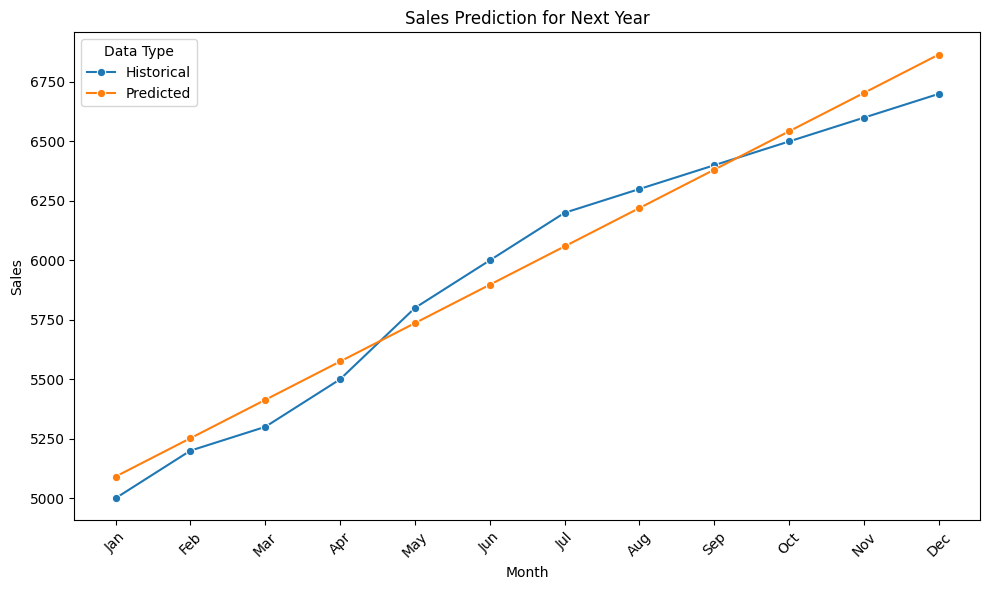

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

# Load the data
apple_products = r'C:\Users\Anuval Mohan sai\Desktop\Project P0\apple_vision_pro_sales.csv'
df = pd.read_csv(apple_products)

# Display the data
print(df.head())

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Use only relevant columns for prediction
df = df[['Year', 'Month', 'Sales']]

# Display processed data
print(df.head())

# Ensure the 'plots' directory exists
if not os.path.exists('plots'):
    os.makedirs('plots')

# Plot historical sales data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Apple Vision Pro Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.savefig('plots/sales_over_time.png')  # Save the plot
plt.show()  # Display the plot

# Prepare data for prediction
X = df[['Year', 'Month']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict sales for next year (e.g., 2024)
next_year = 2024
future_months = pd.DataFrame({
    'Year': [next_year] * 12,
    'Month': list(range(1, 13))
})

future_sales = model.predict(future_months)

# Display predicted future sales
future_sales_df = future_months.copy()
future_sales_df['Predicted_Sales'] = future_sales

print(future_sales_df)

# Combine historical and future sales data for plotting
df['Type'] = 'Historical'
future_sales_df['Type'] = 'Predicted'
plot_data = pd.concat([df, future_sales_df.rename(columns={'Predicted_Sales': 'Sales'})])

# Plot future sales prediction
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='Month', y='Sales', hue='Type', marker='o')
plt.title('Sales Prediction for Next Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Data Type')
plt.tight_layout()
plt.savefig('plots/sales_prediction.png')  # Save the plot
plt.show()  # Display the plot
